Building intelligent irrigation system using AI and soil, weather, crop-specific and topography data.

SOIL DATA:

https://www.kaggle.com/omkargurav/soil-type-classification-soilnet

https://www.kaggle.com/cdminix/us-drought-meteorological-data 

WEATHER DATA:

https://rapidapi.com/blog/access-global-weather-data-with-these-weather-apis/

CROP DATA:

https://www.kaggle.com/harshilpatel355/autoirrigationdata

TOPOGRAPHY DATA:



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('data.csv')
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


There is info only about cotton crops, unfortunately.

In [4]:
df.isnull().sum()

crop        0
moisture    0
temp        0
pump        0
dtype: int64

Dataset is clean, so there is no need to clean it.

In [9]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

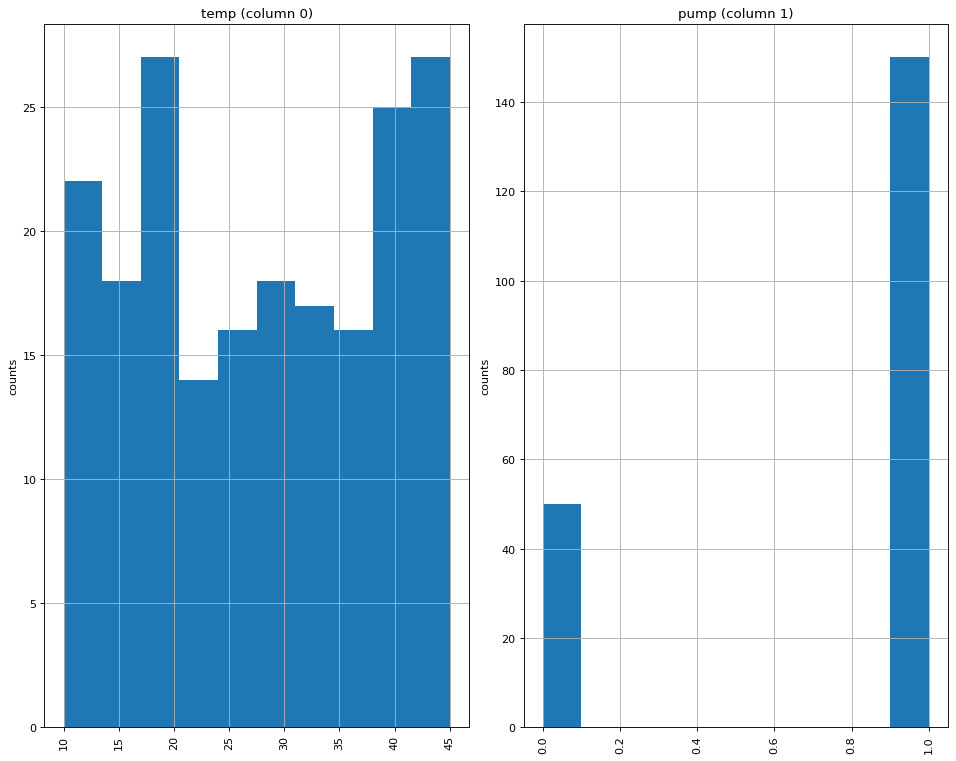

In [11]:
plotPerColumnDistribution(df, 10, 5)

18    9
39    9
29    9
10    8
35    7
17    7
20    7
23    7
44    7
45    7
43    7
41    6
32    6
13    6
14    6
15    6
16    6
40    6
42    6
27    5
33    5
12    5
37    5
28    5
19    4
36    4
25    4
26    4
38    4
30    4
31    4
22    4
21    3
24    3
11    3
34    2
Name: temp, dtype: int64


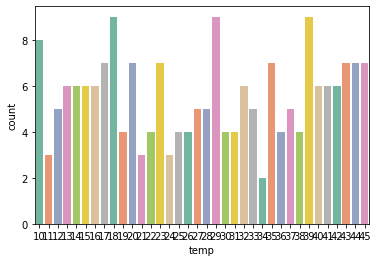

In [12]:
print(df['temp'].value_counts())
sns.countplot(x='temp', data=df, palette='Set2')
plt.show()

1    150
0     50
Name: pump, dtype: int64


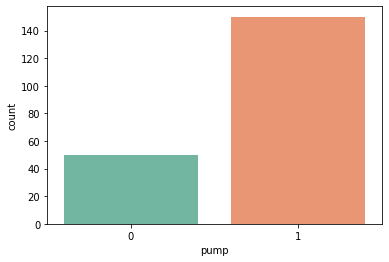

In [13]:
print(df['pump'].value_counts())
sns.countplot(x='pump', data=df, palette='Set2')
plt.show()

**Feature** **engineering**

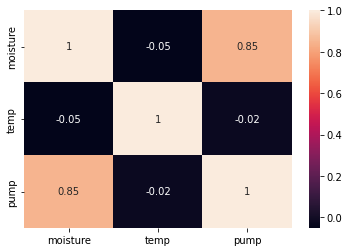

In [15]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [16]:
X = df[['temp', 'moisture']]
Y = df['pump']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 2)
(40, 2)
(160,)
(40,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_train_predict = log_model.predict(X_train)
y_test_predict = log_model.predict(X_test)

In [22]:
score = log_model.score(X_test, Y_test)
print(score)

1.0


In [36]:
print(log_model.predict([[100, 45]]))

[0]
